In [1]:
#Write a program to implement TIC – TAC - TOE game
import numpy as np
import random
from time import sleep
# Creates an empty board
def create_board():
	return(np.array([[0, 0, 0],
					[0, 0, 0],
					[0, 0, 0]]))
# Check for empty places on board
def possibilities(board):
	l = []
	for i in range(len(board)):
		for j in range(len(board)):

			if board[i][j] == 0:
				l.append((i, j))
	return(l)
# Select a random place for the player
def random_place(board, player):
	selection = possibilities(board)
	current_loc = random.choice(selection)
	board[current_loc] = player
	return(board)
# Checks whether the player has three
# of their marks in a horizontal row
def row_win(board, player):
	for x in range(len(board)):
		win = True
		for y in range(len(board)):
			if board[x, y] != player:
				win = False
				continue
		if win == True:
			return(win)
	return(win)
# Checks whether the player has three
# of their marks in a vertical row
def col_win(board, player):
	for x in range(len(board)):
		win = True
		for y in range(len(board)):
			if board[y][x] != player:
				win = False
				continue
		if win == True:
			return(win)
	return(win)
# Checks whether the player has three
# of their marks in a diagonal row
def diag_win(board, player):
	win = True
	y = 0
	for x in range(len(board)):
		if board[x, x] != player:
			win = False
	if win:
		return win
	win = True
	if win:
		for x in range(len(board)):
			y = len(board) - 1 - x
			if board[x, y] != player:
				win = False
	return win
# Evaluates whether there is a winner or a tie
def evaluate(board):
	winner = 0
	for player in [1, 2]:
		if (row_win(board, player) or
				col_win(board, player) or
				diag_win(board, player)):
			winner = player
	if np.all(board != 0) and winner == 0:
		winner = -1
	return winner
# Main function to start the game
def play_game():
	board, winner, counter = create_board(), 0, 1
	print(board)
	sleep(2)
	while winner == 0:
		for player in [1, 2]:
			board = random_place(board, player)
			print("Board after " + str(counter) + " move")
			print(board)
			sleep(2)
			counter += 1
			winner = evaluate(board)
			if winner != 0:
				break
	return(winner)
# Driver Code
print("Winner is: " + str(play_game()))


[[0 0 0]
 [0 0 0]
 [0 0 0]]
Board after 1 move
[[0 0 1]
 [0 0 0]
 [0 0 0]]
Board after 2 move
[[0 0 1]
 [2 0 0]
 [0 0 0]]
Board after 3 move
[[0 0 1]
 [2 0 0]
 [0 1 0]]
Board after 4 move
[[0 0 1]
 [2 0 0]
 [0 1 2]]
Board after 5 move
[[0 0 1]
 [2 0 0]
 [1 1 2]]
Board after 6 move
[[2 0 1]
 [2 0 0]
 [1 1 2]]
Board after 7 move
[[2 1 1]
 [2 0 0]
 [1 1 2]]
Board after 8 move
[[2 1 1]
 [2 0 2]
 [1 1 2]]
Board after 9 move
[[2 1 1]
 [2 1 2]
 [1 1 2]]
Winner is: 1


In [2]:
import numpy as np
import random
from time import sleep

# Create an empty 3x3 board
def create_board():
    return np.zeros((3, 3), dtype=int)

# Return list of available (i, j) positions
def possibilities(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == 0]

# Place a mark randomly for the player
def random_place(board, player):
    available = possibilities(board)
    if available:
        move = random.choice(available)
        board[move] = player
    return board

# Check horizontal win
def row_win(board, player):
    for row in board:
        if np.all(row == player):
            return True
    return False

# Check vertical win
def col_win(board, player):
    for col in board.T:
        if np.all(col == player):
            return True
    return False

# Check diagonal win
def diag_win(board, player):
    if np.all(np.diag(board) == player) or np.all(np.diag(np.fliplr(board)) == player):
        return True
    return False

# Evaluate the game state: 0 = ongoing, 1/2 = winner, -1 = tie
def evaluate(board):
    for player in [1, 2]:
        if row_win(board, player) or col_win(board, player) or diag_win(board, player):
            return player
    if np.all(board != 0):
        return -1
    return 0

# Main game loop
def play_game():
    board = create_board()
    winner = 0
    move_count = 1
    print("Initial Board:")
    print(board)
    sleep(1)

    while winner == 0:
        for player in [1, 2]:
            board = random_place(board, player)
            print(f"\nBoard after move {move_count} (Player {player}):")
            print(board)
            sleep(1)
            move_count += 1
            winner = evaluate(board)
            if winner != 0:
                break

    if winner == -1:
        print("\nGame ended in a tie!")
    else:
        print(f"\nPlayer {winner} wins!")
    return winner

# Run the game
if __name__ == "__main__":
    play_game()


Initial Board:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Board after move 1 (Player 1):
[[0 1 0]
 [0 0 0]
 [0 0 0]]

Board after move 2 (Player 2):
[[0 1 0]
 [0 0 0]
 [0 0 2]]

Board after move 3 (Player 1):
[[0 1 0]
 [0 0 1]
 [0 0 2]]

Board after move 4 (Player 2):
[[0 1 0]
 [2 0 1]
 [0 0 2]]

Board after move 5 (Player 1):
[[1 1 0]
 [2 0 1]
 [0 0 2]]

Board after move 6 (Player 2):
[[1 1 2]
 [2 0 1]
 [0 0 2]]

Board after move 7 (Player 1):
[[1 1 2]
 [2 0 1]
 [0 1 2]]

Board after move 8 (Player 2):
[[1 1 2]
 [2 0 1]
 [2 1 2]]

Board after move 9 (Player 1):
[[1 1 2]
 [2 1 1]
 [2 1 2]]

Player 1 wins!


In [3]:
def minimax(board, depth, is_maximizing):
    if evaluate(board) == 1: return 10 - depth
    if evaluate(board) == 2: return depth - 10
    if np.all(board != 0): return 0

    if is_maximizing:
        best = -np.inf
        for (i, j) in possibilities(board):
            board[i][j] = 1
            score = minimax(board, depth + 1, False)
            board[i][j] = 0
            best = max(best, score)
        return best
    else:
        best = np.inf
        for (i, j) in possibilities(board):
            board[i][j] = 2
            score = minimax(board, depth + 1, True)
            board[i][j] = 0
            best = min(best, score)
        return best


In [5]:
import math

# Display the board neatly
def print_board(board):
    for row in board:
        print(" | ".join([cell if cell != "" else " " for cell in row]))
    print("-" * 9)

# Check winner
def check_winner(board):
    # Rows and columns
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != "":
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != "":
            return board[0][i]
    # Diagonals
    if board[0][0] == board[1][1] == board[2][2] != "":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != "":
        return board[0][2]
    return None

# Check if moves left
def moves_left(board):
    return any("" in row for row in board)

# Evaluate board
def evaluate(board):
    winner = check_winner(board)
    if winner == "X":   # Maximizer
        return 10
    elif winner == "O": # Minimizer
        return -10
    return 0

# Minimax with alpha-beta pruning
def minimax(board, depth, alpha, beta, is_maximizing):
    score = evaluate(board)
    if score != 0 or not moves_left(board):
        return score

    if is_maximizing:
        max_eval = -math.inf
        print(f"{'  ' * depth}MAX turn (depth={depth})")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "X"
                    print(f"{'  ' * depth}Trying move X at ({i},{j})")
                    eval = minimax(board, depth + 1, alpha, beta, False)
                    print(f"{'  ' * depth}Move ({i},{j}) returns score {eval}")
                    board[i][j] = ""
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        print(f"{'  ' * depth}PRUNED at ({i},{j}) α={alpha} β={beta}")
                        break
        return max_eval
    else:
        min_eval = math.inf
        print(f"{'  ' * depth}MIN turn (depth={depth})")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "O"
                    print(f"{'  ' * depth}Trying move O at ({i},{j})")
                    eval = minimax(board, depth + 1, alpha, beta, True)
                    print(f"{'  ' * depth}Move ({i},{j}) returns score {eval}")
                    board[i][j] = ""
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        print(f"{'  ' * depth}PRUNED at ({i},{j}) α={alpha} β={beta}")
                        break
        return min_eval

# Find best move for AI (X)
def best_move(board):
    best_val = -math.inf
    move = (-1, -1)
    print("\n=== Computing Best Move for X (Maximizer) ===\n")
    for i in range(3):
        for j in range(3):
            if board[i][j] == "":
                board[i][j] = "X"
                print(f"Testing move at ({i},{j})")
                move_val = minimax(board, 0, -math.inf, math.inf, False)
                print(f"Result for move ({i},{j}) = {move_val}\n")
                board[i][j] = ""
                if move_val > best_val:
                    best_val = move_val
                    move = (i, j)
    print(f"Best Move Found: {move} with score {best_val}")
    return move

# ---------------- DEMO ----------------
board = [
    ["X", "O", "X"],
    ["", "O", ""],
    ["", "", ""]
]

print("Current Board:")
print_board(board)

best = best_move(board)
print("\nBest Move for AI (X):", best)
board[best[0]][best[1]] = "X"

print("\nFinal Board after AI Move:")
print_board(board)



Current Board:
X | O | X
  | O |  
  |   |  
---------

=== Computing Best Move for X (Maximizer) ===

Testing move at (1,0)
MIN turn (depth=0)
Trying move O at (1,2)
  MAX turn (depth=1)
  Trying move X at (2,0)
  Move (2,0) returns score 10
  Trying move X at (2,1)
    MIN turn (depth=2)
    Trying move O at (2,0)
      MAX turn (depth=3)
      Trying move X at (2,2)
      Move (2,2) returns score 0
    Move (2,0) returns score 0
    PRUNED at (2,0) α=10 β=0
  Move (2,1) returns score 0
  Trying move X at (2,2)
    MIN turn (depth=2)
    Trying move O at (2,0)
      MAX turn (depth=3)
      Trying move X at (2,1)
      Move (2,1) returns score 0
    Move (2,0) returns score 0
    PRUNED at (2,0) α=10 β=0
  Move (2,2) returns score 0
Move (1,2) returns score 10
Trying move O at (2,0)
  MAX turn (depth=1)
  Trying move X at (1,2)
    MIN turn (depth=2)
    Trying move O at (2,1)
    Move (2,1) returns score -10
    Trying move O at (2,2)
      MAX turn (depth=3)
      Trying move X at 

In [6]:
import math

# === Utility for Colors ===
class Color:
    MAX = "\033[92m"      # Green
    MIN = "\033[91m"      # Red
    PRUNE = "\033[93m"    # Yellow
    RESET = "\033[0m"     # Reset to default
    MOVE = "\033[96m"     # Cyan

# Display the board neatly
def print_board(board):
    for row in board:
        print(" | ".join([cell if cell != "" else " " for cell in row]))
    print("-" * 9)

# Check winner
def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != "":
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != "":
            return board[0][i]
    if board[0][0] == board[1][1] == board[2][2] != "":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != "":
        return board[0][2]
    return None

# Check if moves left
def moves_left(board):
    return any("" in row for row in board)

# Evaluate board
def evaluate(board):
    winner = check_winner(board)
    if winner == "X":   # Maximizer
        return 10
    elif winner == "O": # Minimizer
        return -10
    return 0

# Minimax with Alpha-Beta Pruning and color-coded output
def minimax(board, depth, alpha, beta, is_maximizing):
    score = evaluate(board)
    if score != 0 or not moves_left(board):
        return score

    if is_maximizing:
        max_eval = -math.inf
        print(f"{'  ' * depth}{Color.MAX}MAX turn (depth={depth}){Color.RESET}")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "X"
                    print(f"{'  ' * depth}{Color.MOVE}Trying move X at ({i},{j}){Color.RESET}")
                    eval = minimax(board, depth + 1, alpha, beta, False)
                    print(f"{'  ' * depth}{Color.MAX}Move ({i},{j}) returns score {eval}{Color.RESET}")
                    board[i][j] = ""
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        print(f"{'  ' * depth}{Color.PRUNE}PRUNED at ({i},{j}) α={alpha:.1f} β={beta:.1f}{Color.RESET}")
                        break
        return max_eval
    else:
        min_eval = math.inf
        print(f"{'  ' * depth}{Color.MIN}MIN turn (depth={depth}){Color.RESET}")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "O"
                    print(f"{'  ' * depth}{Color.MOVE}Trying move O at ({i},{j}){Color.RESET}")
                    eval = minimax(board, depth + 1, alpha, beta, True)
                    print(f"{'  ' * depth}{Color.MIN}Move ({i},{j}) returns score {eval}{Color.RESET}")
                    board[i][j] = ""
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        print(f"{'  ' * depth}{Color.PRUNE}PRUNED at ({i},{j}) α={alpha:.1f} β={beta:.1f}{Color.RESET}")
                        break
        return min_eval

# Find best move for AI (X)
def best_move(board):
    best_val = -math.inf
    move = (-1, -1)
    print("\n\033[95m=== Computing Best Move for X (Maximizer) ===\033[0m\n")
    for i in range(3):
        for j in range(3):
            if board[i][j] == "":
                board[i][j] = "X"
                print(f"{Color.MOVE}Testing move at ({i},{j}){Color.RESET}")
                move_val = minimax(board, 0, -math.inf, math.inf, False)
                print(f"{Color.MAX}Result for move ({i},{j}) = {move_val}{Color.RESET}\n")
                board[i][j] = ""
                if move_val > best_val:
                    best_val = move_val
                    move = (i, j)
    print(f"{Color.MAX}Best Move Found: {move} with score {best_val}{Color.RESET}")
    return move

# ---------------- DEMO ----------------
board = [
    ["X", "O", "X"],
    ["", "O", ""],
    ["", "", ""]
]

print("\n\033[94mCurrent Board:\033[0m")
print_board(board)

best = best_move(board)
print(f"\n{Color.MAX}Best Move for AI (X): {best}{Color.RESET}")
board[best[0]][best[1]] = "X"

print("\n\033[94mFinal Board after AI Move:\033[0m")
print_board(board)



Current Board:
X | O | X
  | O |  
  |   |  
---------

=== Computing Best Move for X (Maximizer) ===

Testing move at (1,0)
MIN turn (depth=0)
Trying move O at (1,2)
  MAX turn (depth=1)
  Trying move X at (2,0)
  Move (2,0) returns score 10
  Trying move X at (2,1)
    MIN turn (depth=2)
    Trying move O at (2,0)
      MAX turn (depth=3)
      Trying move X at (2,2)
      Move (2,2) returns score 0
    Move (2,0) returns score 0
    PRUNED at (2,0) α=10.0 β=0.0
  Move (2,1) returns score 0
  Trying move X at (2,2)
    MIN turn (depth=2)
    Trying move O at (2,0)
      MAX turn (depth=3)
      Trying move X at (2,1)
      Move (2,1) returns score 0
    Move (2,0) returns score 0
    PRUNED at (2,0) α=10.0 β=0.0
  Move (2,2) returns score 0
Move (1,2) returns score 10
Trying move O at (2,0)
  MAX turn (depth=1)
  Trying move X at (1,2)
    MIN turn (depth=2)
    Trying move O at (2,1)
    Move (2,1) returns score -10
    Trying move O at (2,2)
      MAX turn (depth=3)
      Trying m

In [7]:
import math

# === Color Utility ===
class Color:
    MAX = "\033[92m"      # Green for AI (Maximizer)
    MIN = "\033[91m"      # Red for Human (Minimizer)
    PRUNE = "\033[93m"    # Yellow for Pruning
    MOVE = "\033[96m"     # Cyan for Moves
    BOARD = "\033[94m"    # Blue for board display
    TITLE = "\033[95m"    # Purple for titles
    RESET = "\033[0m"     # Reset color

# === Game Logic ===
def print_board(board):
    print(Color.BOARD + "\nCurrent Board:" + Color.RESET)
    for row in board:
        print(" | ".join([cell if cell != "" else " " for cell in row]))
    print("-" * 9)

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != "":
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != "":
            return board[0][i]
    if board[0][0] == board[1][1] == board[2][2] != "":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != "":
        return board[0][2]
    return None

def moves_left(board):
    return any("" in row for row in board)

def evaluate(board):
    winner = check_winner(board)
    if winner == "X":
        return 10
    elif winner == "O":
        return -10
    return 0

# === Minimax + Alpha-Beta Pruning with Color Trace ===
def minimax(board, depth, alpha, beta, is_maximizing):
    score = evaluate(board)
    if score != 0 or not moves_left(board):
        return score

    if is_maximizing:
        max_eval = -math.inf
        print(f"{'  ' * depth}{Color.MAX}MAX turn (depth={depth}){Color.RESET}")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "X"
                    print(f"{'  ' * depth}{Color.MOVE}Trying move X at ({i},{j}){Color.RESET}")
                    eval = minimax(board, depth + 1, alpha, beta, False)
                    print(f"{'  ' * depth}{Color.MAX}Move ({i},{j}) returns score {eval}{Color.RESET}")
                    board[i][j] = ""
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        print(f"{'  ' * depth}{Color.PRUNE}PRUNED at ({i},{j}) α={alpha:.1f} β={beta:.1f}{Color.RESET}")
                        break
        return max_eval
    else:
        min_eval = math.inf
        print(f"{'  ' * depth}{Color.MIN}MIN turn (depth={depth}){Color.RESET}")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "O"
                    print(f"{'  ' * depth}{Color.MOVE}Trying move O at ({i},{j}){Color.RESET}")
                    eval = minimax(board, depth + 1, alpha, beta, True)
                    print(f"{'  ' * depth}{Color.MIN}Move ({i},{j}) returns score {eval}{Color.RESET}")
                    board[i][j] = ""
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        print(f"{'  ' * depth}{Color.PRUNE}PRUNED at ({i},{j}) α={alpha:.1f} β={beta:.1f}{Color.RESET}")
                        break
        return min_eval

# === AI’s Turn (Maximizer) ===
def best_move(board):
    best_val = -math.inf
    move = (-1, -1)
    print(f"\n{Color.TITLE}=== AI Computing Best Move (X) ==={Color.RESET}\n")
    for i in range(3):
        for j in range(3):
            if board[i][j] == "":
                board[i][j] = "X"
                print(f"{Color.MOVE}Testing move ({i},{j}){Color.RESET}")
                move_val = minimax(board, 0, -math.inf, math.inf, False)
                print(f"{Color.MAX}Result for move ({i},{j}) = {move_val}{Color.RESET}\n")
                board[i][j] = ""
                if move_val > best_val:
                    best_val = move_val
                    move = (i, j)
    print(f"{Color.MAX}AI chooses move {move} with score {best_val}{Color.RESET}")
    return move

# === Human Turn (Minimizer) ===
def player_move(board):
    while True:
        try:
            row = int(input("Enter row (0-2): "))
            col = int(input("Enter column (0-2): "))
            if 0 <= row <= 2 and 0 <= col <= 2 and board[row][col] == "":
                board[row][col] = "O"
                break
            else:
                print("Invalid move! Try again.")
        except ValueError:
            print("Please enter numeric values between 0 and 2.")

# === Game Controller ===
def play_game():
    board = [["", "", ""], ["", "", ""], ["", "", ""]]
    print(Color.TITLE + "Welcome to Tic Tac Toe (You = O, AI = X)" + Color.RESET)
    print_board(board)

    while True:
        # Human Move
        player_move(board)
        print_board(board)
        if check_winner(board) == "O":
            print(Color.MIN + "🎉 You win! (MIN)" + Color.RESET)
            break
        if not moves_left(board):
            print("It's a draw!")
            break

        # AI Move
        best = best_move(board)
        board[best[0]][best[1]] = "X"
        print_board(board)

        if check_winner(board) == "X":
            print(Color.MAX + "🤖 AI wins! (MAX)" + Color.RESET)
            break
        if not moves_left(board):
            print("It's a draw!")
            break

# Run the Game
if __name__ == "__main__":
    play_game()


Welcome to Tic Tac Toe (You = O, AI = X)

Current Board:
  |   |  
  |   |  
  |   |  
---------
Enter row (0-2): 0
Enter column (0-2): 0

Current Board:
O |   |  
  |   |  
  |   |  
---------

=== AI Computing Best Move (X) ===

Testing move (0,1)
MIN turn (depth=0)
Trying move O at (0,2)
  MAX turn (depth=1)
  Trying move X at (1,0)
    MIN turn (depth=2)
    Trying move O at (1,1)
      MAX turn (depth=3)
      Trying move X at (1,2)
        MIN turn (depth=4)
        Trying move O at (2,0)
        Move (2,0) returns score -10
        Trying move O at (2,1)
          MAX turn (depth=5)
          Trying move X at (2,0)
            MIN turn (depth=6)
            Trying move O at (2,2)
            Move (2,2) returns score -10
          Move (2,0) returns score -10
          PRUNED at (2,0) α=-10.0 β=-10.0
        Move (2,1) returns score -10
        Trying move O at (2,2)
        Move (2,2) returns score -10
      Move (1,2) returns score -10
      Trying move X at (2,0)
        MIN t

In [8]:
import math

# === Color Utility ===
class Color:
    MAX = "\033[92m"      # Green for AI (Maximizer)
    MIN = "\033[91m"      # Red for Human (Minimizer)
    PRUNE = "\033[93m"    # Yellow for Pruning
    MOVE = "\033[96m"     # Cyan for Moves
    BOARD = "\033[94m"    # Blue for board display
    TITLE = "\033[95m"    # Purple for titles
    STAT = "\033[90m"     # Gray for stats
    RESET = "\033[0m"     # Reset color

# === Global Counters ===
stats = {
    "nodes": 0,
    "pruned": 0,
    "max_depth": 0
}

# === Game Logic ===
def print_board(board):
    print(Color.BOARD + "\nCurrent Board:" + Color.RESET)
    for row in board:
        print(" | ".join([cell if cell != "" else " " for cell in row]))
    print("-" * 9)

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != "":
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != "":
            return board[0][i]
    if board[0][0] == board[1][1] == board[2][2] != "":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != "":
        return board[0][2]
    return None

def moves_left(board):
    return any("" in row for row in board)

def evaluate(board):
    winner = check_winner(board)
    if winner == "X":
        return 10
    elif winner == "O":
        return -10
    return 0

# === Minimax + Alpha-Beta Pruning with Metrics ===
def minimax(board, depth, alpha, beta, is_maximizing):
    stats["nodes"] += 1
    stats["max_depth"] = max(stats["max_depth"], depth)

    score = evaluate(board)
    if score != 0 or not moves_left(board):
        return score

    if is_maximizing:
        max_eval = -math.inf
        print(f"{'  ' * depth}{Color.MAX}MAX turn (depth={depth}){Color.RESET}")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "X"
                    print(f"{'  ' * depth}{Color.MOVE}Trying move X at ({i},{j}){Color.RESET}")
                    eval = minimax(board, depth + 1, alpha, beta, False)
                    print(f"{'  ' * depth}{Color.MAX}Move ({i},{j}) returns score {eval}{Color.RESET}")
                    board[i][j] = ""
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        stats["pruned"] += 1
                        print(f"{'  ' * depth}{Color.PRUNE}PRUNED at ({i},{j}) α={alpha:.1f} β={beta:.1f}{Color.RESET}")
                        break
        return max_eval
    else:
        min_eval = math.inf
        print(f"{'  ' * depth}{Color.MIN}MIN turn (depth={depth}){Color.RESET}")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "O"
                    print(f"{'  ' * depth}{Color.MOVE}Trying move O at ({i},{j}){Color.RESET}")
                    eval = minimax(board, depth + 1, alpha, beta, True)
                    print(f"{'  ' * depth}{Color.MIN}Move ({i},{j}) returns score {eval}{Color.RESET}")
                    board[i][j] = ""
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        stats["pruned"] += 1
                        print(f"{'  ' * depth}{Color.PRUNE}PRUNED at ({i},{j}) α={alpha:.1f} β={beta:.1f}{Color.RESET}")
                        break
        return min_eval

# === AI’s Turn (Maximizer) ===
def best_move(board):
    best_val = -math.inf
    move = (-1, -1)
    print(f"\n{Color.TITLE}=== AI Computing Best Move (X) ==={Color.RESET}\n")

    # Reset metrics before each AI decision
    stats.update({"nodes": 0, "pruned": 0, "max_depth": 0})

    for i in range(3):
        for j in range(3):
            if board[i][j] == "":
                board[i][j] = "X"
                print(f"{Color.MOVE}Testing move ({i},{j}){Color.RESET}")
                move_val = minimax(board, 0, -math.inf, math.inf, False)
                print(f"{Color.MAX}Result for move ({i},{j}) = {move_val}{Color.RESET}\n")
                board[i][j] = ""
                if move_val > best_val:
                    best_val = move_val
                    move = (i, j)

    print(f"{Color.MAX}AI chooses move {move} with score {best_val}{Color.RESET}")
    print(f"{Color.STAT}Nodes evaluated: {stats['nodes']}, Branches pruned: {stats['pruned']}, Max depth: {stats['max_depth']}{Color.RESET}")
    print("-" * 40)
    return move

# === Human Turn (Minimizer) ===
def player_move(board):
    while True:
        try:
            row = int(input("Enter row (0-2): "))
            col = int(input("Enter column (0-2): "))
            if 0 <= row <= 2 and 0 <= col <= 2 and board[row][col] == "":
                board[row][col] = "O"
                break
            else:
                print("Invalid move! Try again.")
        except ValueError:
            print("Please enter numeric values between 0 and 2.")

# === Game Controller ===
def play_game():
    board = [["", "", ""], ["", "", ""], ["", "", ""]]
    print(Color.TITLE + "Welcome to Tic Tac Toe (You = O, AI = X)" + Color.RESET)
    print_board(board)

    while True:
        # Human Move
        player_move(board)
        print_board(board)
        if check_winner(board) == "O":
            print(Color.MIN + "🎉 You win! (MIN)" + Color.RESET)
            break
        if not moves_left(board):
            print("It's a draw!")
            break

        # AI Move
        best = best_move(board)
        board[best[0]][best[1]] = "X"
        print_board(board)

        if check_winner(board) == "X":
            print(Color.MAX + "🤖 AI wins! (MAX)" + Color.RESET)
            break
        if not moves_left(board):
            print("It's a draw!")
            break

# Run the Game
if __name__ == "__main__":
    play_game()
// check this looks good

Welcome to Tic Tac Toe (You = O, AI = X)

Current Board:
  |   |  
  |   |  
  |   |  
---------
Enter row (0-2): 0
Enter column (0-2): 0

Current Board:
O |   |  
  |   |  
  |   |  
---------

=== AI Computing Best Move (X) ===

Testing move (0,1)
MIN turn (depth=0)
Trying move O at (0,2)
  MAX turn (depth=1)
  Trying move X at (1,0)
    MIN turn (depth=2)
    Trying move O at (1,1)
      MAX turn (depth=3)
      Trying move X at (1,2)
        MIN turn (depth=4)
        Trying move O at (2,0)
        Move (2,0) returns score -10
        Trying move O at (2,1)
          MAX turn (depth=5)
          Trying move X at (2,0)
            MIN turn (depth=6)
            Trying move O at (2,2)
            Move (2,2) returns score -10
          Move (2,0) returns score -10
          PRUNED at (2,0) α=-10.0 β=-10.0
        Move (2,1) returns score -10
        Trying move O at (2,2)
        Move (2,2) returns score -10
      Move (1,2) returns score -10
      Trying move X at (2,0)
        MIN t

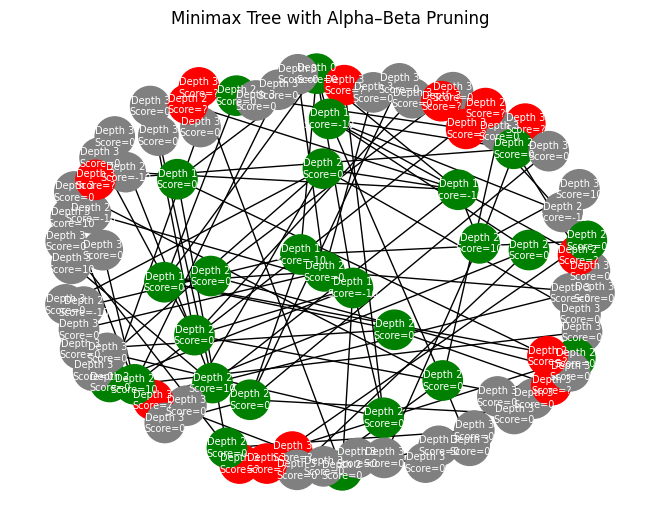

In [9]:
import math
import matplotlib.pyplot as plt
import networkx as nx

# === Tree Node Structure ===
class Node:
    def __init__(self, state, move=None, score=None):
        self.state = state          # board state (tuple)
        self.move = move            # move leading to this node
        self.score = score          # minimax score (if terminal)
        self.children = []          # list of child nodes
        self.pruned = False         # if branch was pruned

# === Helper Functions ===
def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != "":
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != "":
            return board[0][i]
    if board[0][0] == board[1][1] == board[2][2] != "":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != "":
        return board[0][2]
    return None

def evaluate(board):
    winner = check_winner(board)
    if winner == "X":
        return 10
    elif winner == "O":
        return -10
    return 0

def moves_left(board):
    return any("" in row for row in board)

# === Build Minimax Tree with Alpha–Beta Pruning ===
def minimax_tree(board, depth, alpha, beta, is_max, parent=None, max_depth=3):
    node = Node(tuple(tuple(row) for row in board))
    if depth > max_depth:
        return node

    score = evaluate(board)
    if score != 0 or not moves_left(board) or depth == max_depth:
        node.score = score
        return node

    if is_max:
        max_eval = -math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "X"
                    child = minimax_tree(board, depth+1, alpha, beta, False, node, max_depth)
                    node.children.append(child)
                    board[i][j] = ""
                    max_eval = max(max_eval, child.score if child.score is not None else 0)
                    alpha = max(alpha, max_eval)
                    if beta <= alpha:
                        pruned = Node(tuple(tuple(r) for r in board))
                        pruned.pruned = True
                        node.children.append(pruned)
                        node.score = max_eval
                        return node
        node.score = max_eval
    else:
        min_eval = math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "O"
                    child = minimax_tree(board, depth+1, alpha, beta, True, node, max_depth)
                    node.children.append(child)
                    board[i][j] = ""
                    min_eval = min(min_eval, child.score if child.score is not None else 0)
                    beta = min(beta, min_eval)
                    if beta <= alpha:
                        pruned = Node(tuple(tuple(r) for r in board))
                        pruned.pruned = True
                        node.children.append(pruned)
                        node.score = min_eval
                        return node
        node.score = min_eval
    return node

# === Visualization ===
def visualize_tree(root):
    G = nx.DiGraph()

    def add_edges(node, parent=None, idx=0):
        label = f"Depth {idx}\nScore={node.score if node.score is not None else '?'}"
        G.add_node(id(node), label=label, color="red" if node.pruned else "green" if node.children else "gray")
        if parent:
            G.add_edge(id(parent), id(node))
        for child in node.children:
            add_edges(child, node, idx+1)

    add_edges(root)
    pos = nx.spring_layout(G, seed=42, k=1.2)
    colors = [G.nodes[n]["color"] for n in G.nodes()]
    labels = nx.get_node_attributes(G, "label")
    nx.draw(G, pos, with_labels=False, node_color=colors, node_size=800, arrows=False)
    nx.draw_networkx_labels(G, pos, labels, font_size=7, font_color="white")
    plt.title("Minimax Tree with Alpha–Beta Pruning")
    plt.show()

# === Demo Run ===
board = [["X", "O", ""],
         ["", "O", ""],
         ["", "", ""]]

tree_root = minimax_tree(board, 0, -math.inf, math.inf, True, max_depth=3)
visualize_tree(tree_root)


In [10]:
import math
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import clear_output
import time

# === Define Node Structure ===
class Node:
    def __init__(self, name, alpha=-math.inf, beta=math.inf, score=None):
        self.name = name
        self.children = []
        self.alpha = alpha
        self.beta = beta
        self.score = score
        self.pruned = False

# === Build Minimax Tree with Alpha-Beta Tracking ===
def build_tree(depth=3, is_max=True, alpha=-math.inf, beta=math.inf, parent_name="Root", graph=None, parent=None, counter=[0]):
    counter[0] += 1
    name = f"{parent_name}-{counter[0]}"
    node = Node(name, alpha, beta)

    if graph is not None and parent:
        graph.add_edge(parent, name)

    # Stopping condition
    if depth == 0:
        node.score = (10 if is_max else -10) if counter[0] % 2 == 0 else 0
        return node

    best_val = -math.inf if is_max else math.inf
    for i in range(2):  # Two branches per node
        child = build_tree(depth - 1, not is_max, alpha, beta, name, graph, name, counter)
        node.children.append(child)
        if is_max:
            best_val = max(best_val, child.score)
            alpha = max(alpha, best_val)
        else:
            best_val = min(best_val, child.score)
            beta = min(beta, best_val)

        # Pruning condition
        if beta <= alpha:
            pruned = Node(f"{name}-pruned-{i}", score=None)
            pruned.pruned = True
            node.children.append(pruned)
            if graph is not None:
                graph.add_edge(name, pruned.name)
            break

    node.score = best_val
    node.alpha, node.beta = alpha, beta
    return node

# === Visualize the Tree ===
def draw_tree(graph, highlight_pruned=True, pause=0.8):
    plt.figure(figsize=(10,6))
    pos = nx.spring_layout(graph, seed=42)
    colors = []
    for n in graph.nodes():
        if "pruned" in n:
            colors.append("red")
        elif "Root" in n:
            colors.append("lightgreen")
        else:
            colors.append("skyblue")
    nx.draw(graph, pos, with_labels=True, node_color=colors, node_size=900, font_size=7, arrows=False)
    plt.title("Minimax Tree with Alpha–Beta Pruning")
    plt.show()
    time.sleep(pause)
    clear_output(wait=True)

# === Animate Tree Building ===
def animate_tree():
    G = nx.DiGraph()
    print("Building and Visualizing Tree...\n")
    root = build_tree(graph=G, depth=3)
    draw_tree(G, pause=1)
    print("✅ Animation Complete – Pruned branches are red")

animate_tree()


✅ Animation Complete – Pruned branches are red


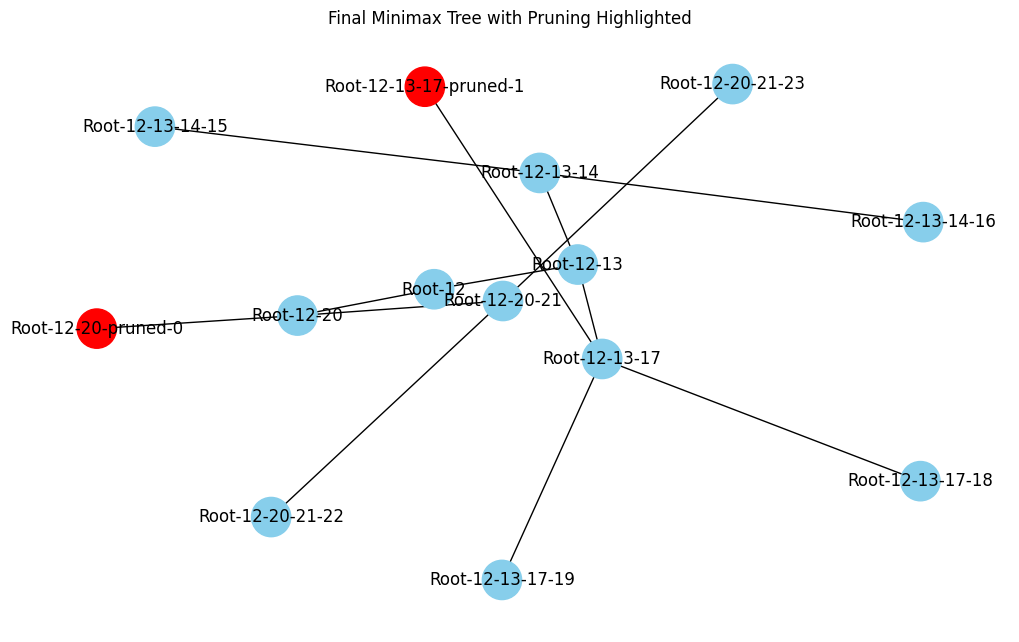

In [11]:
G = nx.DiGraph()
root = build_tree(graph=G, depth=3)
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, seed=42)
colors = ["red" if "pruned" in n else "skyblue" for n in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=800, arrows=False)
plt.title("Final Minimax Tree with Pruning Highlighted")
plt.show()


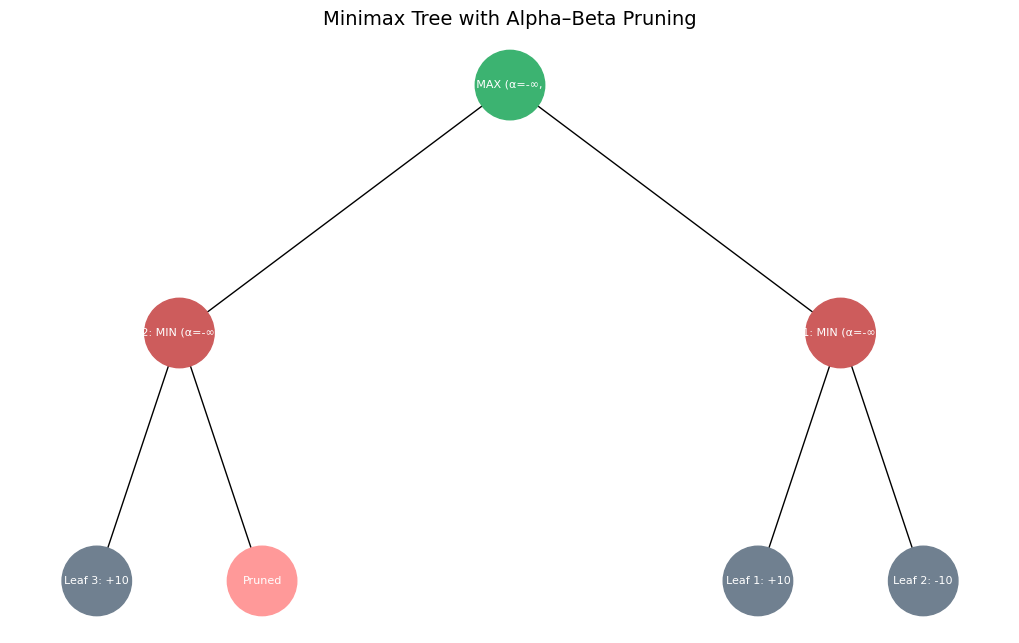

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# === Add Nodes ===
G.add_node("Root", label="Root: MAX (α=-∞, β=∞)", color="#3CB371")          # Green
G.add_node("Move2", label="Move 2: MIN (α=-∞, β=∞)", color="#CD5C5C")       # Red
G.add_node("Move1", label="Move 1: MIN (α=-∞, β=∞)", color="#CD5C5C")       # Red
G.add_node("Leaf3", label="Leaf 3: +10", color="#708090")                   # Gray
G.add_node("Pruned", label="Pruned", color="#FF9999")                       # Light Red
G.add_node("Leaf1", label="Leaf 1: +10", color="#708090")
G.add_node("Leaf2", label="Leaf 2: -10", color="#708090")

# === Add Edges ===
G.add_edges_from([
    ("Root", "Move2"),
    ("Root", "Move1"),
    ("Move2", "Leaf3"),
    ("Move2", "Pruned"),
    ("Move1", "Leaf1"),
    ("Move1", "Leaf2")
])

# === Layout ===
pos = {
    "Root": (0, 3),
    "Move2": (-2, 2),
    "Move1": (2, 2),
    "Leaf3": (-2.5, 1),
    "Pruned": (-1.5, 1),
    "Leaf1": (1.5, 1),
    "Leaf2": (2.5, 1)
}

# === Colors and Labels ===
colors = [G.nodes[n]['color'] for n in G.nodes()]
labels = {n: G.nodes[n]['label'] for n in G.nodes()}

# === Draw ===
plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=False, node_color=colors, node_size=2500, arrows=False)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color="white")

plt.title("Minimax Tree with Alpha–Beta Pruning", fontsize=14)
plt.axis("off")
plt.show()


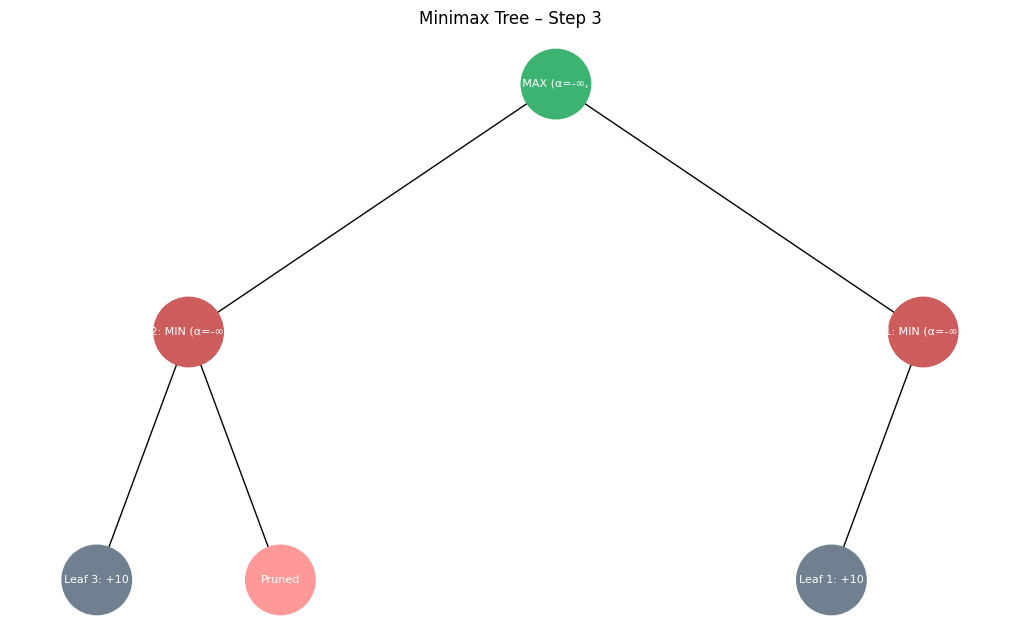

In [13]:
import time
from IPython.display import clear_output

for depth in range(1, 4):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))
    subset = list(G.nodes())[:depth*2]  # reveal step by step
    nx.draw(G.subgraph(subset), pos, with_labels=False, 
            node_color=[G.nodes[n]['color'] for n in subset],
            node_size=2500, arrows=False)
    nx.draw_networkx_labels(G.subgraph(subset), pos, labels={n:G.nodes[n]['label'] for n in subset}, 
                            font_size=8, font_color="white")
    plt.title(f"Minimax Tree – Step {depth}")
    plt.axis("off")
    plt.show()
    time.sleep(1)


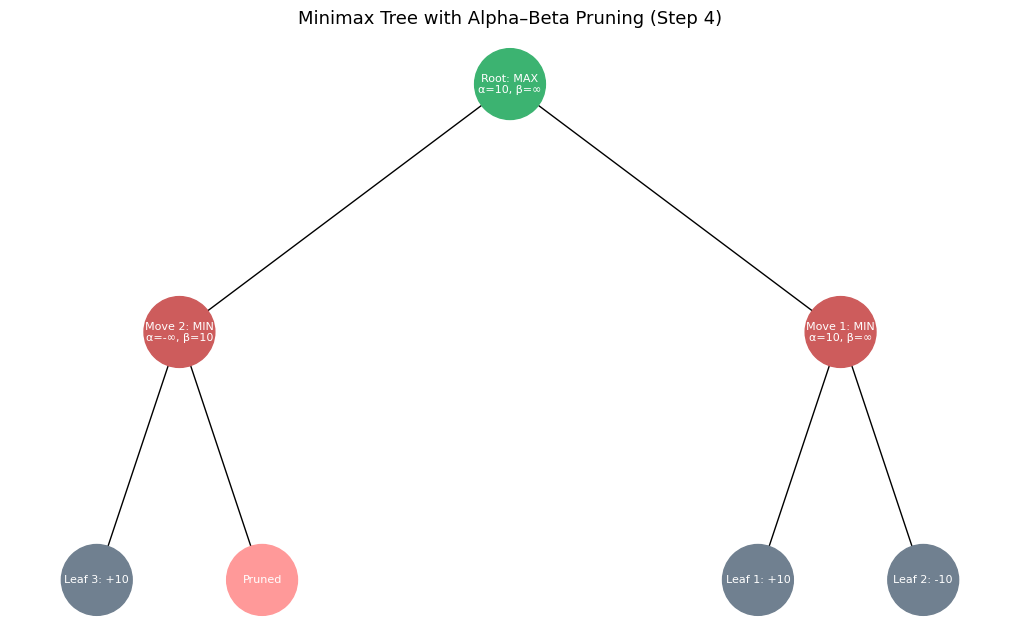

✅ Animation Complete — Red node shows pruning when β ≤ α.


In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import time
from IPython.display import clear_output

# === Define Helper to Draw Tree ===
def draw_tree(G, pos, step, alpha_beta, pruned_nodes):
    clear_output(wait=True)
    plt.figure(figsize=(10,6))

    # Define colors
    node_colors = []
    for n in G.nodes():
        if n in pruned_nodes:
            node_colors.append("#FF9999")  # Pruned
        elif "Root" in n:
            node_colors.append("#3CB371")  # Green for MAX
        elif "Move" in n:
            node_colors.append("#CD5C5C")  # Red for MIN
        else:
            node_colors.append("#708090")  # Gray for leaves

    # Labels with dynamic α, β
    labels = {}
    for n in G.nodes():
        base = G.nodes[n]['label']
        if n in alpha_beta:
            a, b = alpha_beta[n]
            labels[n] = f"{base}\nα={a if a != -float('inf') else '-∞'}, β={b if b != float('inf') else '∞'}"
        else:
            labels[n] = base

    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=2600, arrows=False)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_color="white")
    plt.title(f"Minimax Tree with Alpha–Beta Pruning (Step {step})", fontsize=13)
    plt.axis("off")
    plt.show()
    time.sleep(1.5)

# === Build the Tree ===
G = nx.DiGraph()
G.add_node("Root", label="Root: MAX")
G.add_node("Move2", label="Move 2: MIN")
G.add_node("Move1", label="Move 1: MIN")
G.add_node("Leaf3", label="Leaf 3: +10")
G.add_node("Pruned", label="Pruned")
G.add_node("Leaf1", label="Leaf 1: +10")
G.add_node("Leaf2", label="Leaf 2: -10")
G.add_edges_from([
    ("Root", "Move2"),
    ("Root", "Move1"),
    ("Move2", "Leaf3"),
    ("Move2", "Pruned"),
    ("Move1", "Leaf1"),
    ("Move1", "Leaf2")
])

# Positions (manually tuned)
pos = {
    "Root": (0, 3),
    "Move2": (-2, 2),
    "Move1": (2, 2),
    "Leaf3": (-2.5, 1),
    "Pruned": (-1.5, 1),
    "Leaf1": (1.5, 1),
    "Leaf2": (2.5, 1)
}

# === Animation States ===
steps = [
    # Step 1
    {"alpha_beta": {"Root": (-float('inf'), float('inf')),
                    "Move2": (-float('inf'), float('inf')),
                    "Move1": (-float('inf'), float('inf'))},
     "pruned": []},
    # Step 2 - after evaluating Leaf3
    {"alpha_beta": {"Root": (-float('inf'), float('inf')),
                    "Move2": (-float('inf'), 10),
                    "Move1": (-float('inf'), float('inf'))},
     "pruned": []},
    # Step 3 - pruning occurs under Move2
    {"alpha_beta": {"Root": (-float('inf'), float('inf')),
                    "Move2": (-float('inf'), 10),
                    "Move1": (-float('inf'), float('inf'))},
     "pruned": ["Pruned"]},
    # Step 4 - Move1 evaluated
    {"alpha_beta": {"Root": (10, float('inf')),
                    "Move2": (-float('inf'), 10),
                    "Move1": (10, float('inf'))},
     "pruned": ["Pruned"]}
]

# === Run Animation ===
for i, step in enumerate(steps, 1):
    draw_tree(G, pos, i, step["alpha_beta"], step["pruned"])

print("✅ Animation Complete — Red node shows pruning when β ≤ α.")


In [15]:
import math

# === Color Utility ===
class Color:
    MAX = "\033[92m"      # Green for AI (Maximizer)
    MIN = "\033[91m"      # Red for Human (Minimizer)
    PRUNE = "\033[93m"    # Yellow for Pruning
    MOVE = "\033[96m"     # Cyan for Moves
    BOARD = "\033[94m"    # Blue for board display
    TITLE = "\033[95m"    # Purple for titles
    STAT = "\033[97m"     # White for stats (changed)
    RESET = "\033[0m"     # Reset color

# === Global Counters ===
stats = {"nodes": 0, "pruned": 0, "max_depth": 0}

# === Game Logic ===
def print_board(board):
    print(Color.BOARD + "\nCurrent Board:" + Color.RESET)
    for row in board:
        print(" | ".join([cell if cell != "" else " " for cell in row]))
    print("-" * 9)

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] != "":
            return board[i][0]
        if board[0][i] == board[1][i] == board[2][i] != "":
            return board[0][i]
    if board[0][0] == board[1][1] == board[2][2] != "":
        return board[0][0]
    if board[0][2] == board[1][1] == board[2][0] != "":
        return board[0][2]
    return None

def moves_left(board):
    return any("" in row for row in board)

def evaluate(board):
    winner = check_winner(board)
    if winner == "X":
        return 10
    elif winner == "O":
        return -10
    return 0

# === Minimax + Alpha–Beta Pruning ===
def minimax(board, depth, alpha, beta, is_maximizing):
    stats["nodes"] += 1
    stats["max_depth"] = max(stats["max_depth"], depth)

    score = evaluate(board)
    if score != 0 or not moves_left(board):
        return score

    if is_maximizing:
        max_eval = -math.inf
        print(f"{'  ' * depth}{Color.MAX}MAX turn (depth={depth}){Color.RESET}")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "X"
                    print(f"{'  ' * depth}{Color.MOVE}Trying move X at ({i},{j}){Color.RESET}")
                    eval = minimax(board, depth + 1, alpha, beta, False)
                    print(f"{'  ' * depth}{Color.MAX}Move ({i},{j}) returns score {eval}{Color.RESET}")
                    board[i][j] = ""
                    max_eval = max(max_eval, eval)
                    alpha = max(alpha, eval)
                    if beta <= alpha:
                        stats["pruned"] += 1
                        print(f"{'  ' * depth}{Color.PRUNE}PRUNED at ({i},{j}) α={alpha:.1f}, β={beta:.1f}{Color.RESET}")
                        break
        return max_eval
    else:
        min_eval = math.inf
        print(f"{'  ' * depth}{Color.MIN}MIN turn (depth={depth}){Color.RESET}")
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "O"
                    print(f"{'  ' * depth}{Color.MOVE}Trying move O at ({i},{j}){Color.RESET}")
                    eval = minimax(board, depth + 1, alpha, beta, True)
                    print(f"{'  ' * depth}{Color.MIN}Move ({i},{j}) returns score {eval}{Color.RESET}")
                    board[i][j] = ""
                    min_eval = min(min_eval, eval)
                    beta = min(beta, eval)
                    if beta <= alpha:
                        stats["pruned"] += 1
                        print(f"{'  ' * depth}{Color.PRUNE}PRUNED at ({i},{j}) α={alpha:.1f}, β={beta:.1f}{Color.RESET}")
                        break
        return min_eval

# === AI Turn ===
def best_move(board):
    best_val = -math.inf
    move = (-1, -1)
    print(f"\n{Color.TITLE}=== AI Computing Best Move (X) ==={Color.RESET}\n")

    # Reset metrics before each AI decision
    stats.update({"nodes": 0, "pruned": 0, "max_depth": 0})

    for i in range(3):
        for j in range(3):
            if board[i][j] == "":
                board[i][j] = "X"
                print(f"{Color.MOVE}Testing move ({i},{j}){Color.RESET}")
                move_val = minimax(board, 0, -math.inf, math.inf, False)
                print(f"{Color.MAX}Result for move ({i},{j}) = {move_val}{Color.RESET}\n")
                board[i][j] = ""
                if move_val > best_val:
                    best_val = move_val
                    move = (i, j)

    print(f"{Color.MAX}AI chooses move {move} with score {best_val}{Color.RESET}\n")

    # === Emphasized Performance Summary ===
    print(Color.TITLE + "----- PERFORMANCE SUMMARY -----" + Color.RESET)
    print(Color.STAT + f"Nodes explored: {stats['nodes']}")
    print(f"Branches pruned: {stats['pruned']}")
    print(f"Max depth reached: {stats['max_depth']}" + Color.RESET)
    print(Color.TITLE + "--------------------------------" + Color.RESET)

    print(f"\n{Color.STAT}Notice how Alpha–Beta pruning cuts off unnecessary branches.")
    print(f"This dramatically reduces nodes explored compared to plain Minimax!{Color.RESET}\n")
    return move

# === Human Turn ===
def player_move(board):
    while True:
        try:
            row = int(input("Enter row (0-2): "))
            col = int(input("Enter column (0-2): "))
            if 0 <= row <= 2 and 0 <= col <= 2 and board[row][col] == "":
                board[row][col] = "O"
                break
            else:
                print("Invalid move! Try again.")
        except ValueError:
            print("Please enter numeric values between 0 and 2.")

# === Game Controller ===
def play_game():
    board = [["", "", ""], ["", "", ""], ["", "", ""]]
    print(Color.TITLE + "\n🎯 Welcome to Tic Tac Toe (You = O, AI = X)" + Color.RESET)
    print(Color.STAT + "\n🧠 Minimax explores all possible outcomes.")
    print("✨ Alpha–Beta Pruning skips unnecessary paths — watch how node count drops!" + Color.RESET)
    print_board(board)

    while True:
        # Human Move
        player_move(board)
        print_board(board)
        if check_winner(board) == "O":
            print(Color.MIN + "🎉 You win! (MIN)" + Color.RESET)
            break
        if not moves_left(board):
            print("It's a draw!")
            break

        # AI Move
        best = best_move(board)
        board[best[0]][best[1]] = "X"
        print_board(board)

        if check_winner(board) == "X":
            print(Color.MAX + "🤖 AI wins! (MAX)" + Color.RESET)
            break
        if not moves_left(board):
            print("It's a draw!")
            break

# Run the Game
if __name__ == "__main__":
    play_game()



🎯 Welcome to Tic Tac Toe (You = O, AI = X)

🧠 Minimax explores all possible outcomes.
✨ Alpha–Beta Pruning skips unnecessary paths — watch how node count drops!

Current Board:
  |   |  
  |   |  
  |   |  
---------
Enter row (0-2): 0
Enter column (0-2): 0

Current Board:
O |   |  
  |   |  
  |   |  
---------

=== AI Computing Best Move (X) ===

Testing move (0,1)
MIN turn (depth=0)
Trying move O at (0,2)
  MAX turn (depth=1)
  Trying move X at (1,0)
    MIN turn (depth=2)
    Trying move O at (1,1)
      MAX turn (depth=3)
      Trying move X at (1,2)
        MIN turn (depth=4)
        Trying move O at (2,0)
        Move (2,0) returns score -10
        Trying move O at (2,1)
          MAX turn (depth=5)
          Trying move X at (2,0)
            MIN turn (depth=6)
            Trying move O at (2,2)
            Move (2,2) returns score -10
          Move (2,0) returns score -10
          PRUNED at (2,0) α=-10.0, β=-10.0
        Move (2,1) returns score -10
        Trying move O a

In [16]:
import math
import copy

def minimax_no_pruning(board, depth, is_maximizing):
    # Classic Minimax — no pruning
    global nodes_plain
    nodes_plain += 1

    score = evaluate(board)
    if score != 0 or not moves_left(board):
        return score

    if is_maximizing:
        best = -math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "X"
                    val = minimax_no_pruning(board, depth + 1, False)
                    board[i][j] = ""
                    best = max(best, val)
        return best
    else:
        best = math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "O"
                    val = minimax_no_pruning(board, depth + 1, True)
                    board[i][j] = ""
                    best = min(best, val)
        return best


def minimax_with_pruning(board, depth, alpha, beta, is_maximizing):
    # Alpha-Beta version
    global nodes_pruned, prunes_count
    nodes_pruned += 1

    score = evaluate(board)
    if score != 0 or not moves_left(board):
        return score

    if is_maximizing:
        max_eval = -math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "X"
                    eval_val = minimax_with_pruning(board, depth + 1, alpha, beta, False)
                    board[i][j] = ""
                    max_eval = max(max_eval, eval_val)
                    alpha = max(alpha, eval_val)
                    if beta <= alpha:
                        prunes_count += 1
                        return max_eval
        return max_eval
    else:
        min_eval = math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == "":
                    board[i][j] = "O"
                    eval_val = minimax_with_pruning(board, depth + 1, alpha, beta, True)
                    board[i][j] = ""
                    min_eval = min(min_eval, eval_val)
                    beta = min(beta, eval_val)
                    if beta <= alpha:
                        prunes_count += 1
                        return min_eval
        return min_eval


# === Compare ===
board = [["X", "O", ""],
         ["", "O", ""],
         ["", "", ""]]

nodes_plain = 0
nodes_pruned = 0
prunes_count = 0

minimax_no_pruning(copy.deepcopy(board), 0, True)
minimax_with_pruning(copy.deepcopy(board), 0, -math.inf, math.inf, True)

print(f"\n\033[95m=== Node Comparison ===\033[0m")
print(f"\033[97mPlain Minimax explored:\033[92m {nodes_plain} nodes")
print(f"\033[97mAlpha–Beta Pruning explored:\033[92m {nodes_pruned} nodes")
print(f"\033[97mBranches pruned:\033[91m {prunes_count}")
print(f"\033[97mReduction:\033[93m {(1 - (nodes_pruned / nodes_plain)) * 100:.1f}% fewer nodes evaluated!\033[0m\n")



=== Node Comparison ===
Plain Minimax explored: 1055 nodes
Alpha–Beta Pruning explored: 269 nodes
Branches pruned: 96
Reduction: 74.5% fewer nodes evaluated!



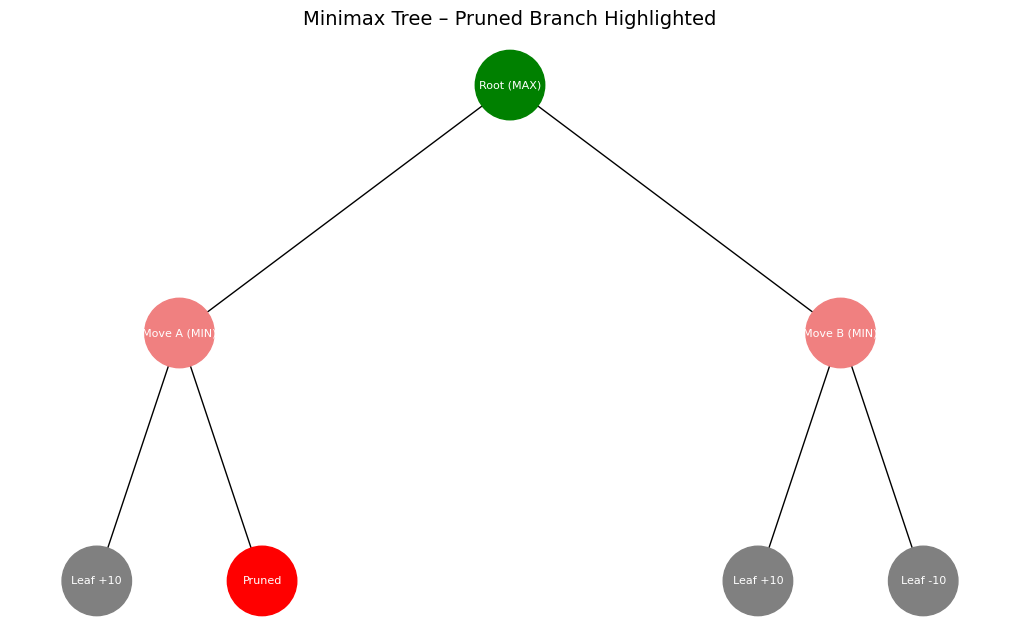

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_minimax_tree():
    G = nx.DiGraph()

    # === Nodes ===
    G.add_node("Root", label="Root (MAX)", color="green")        # AI
    G.add_node("A", label="Move A (MIN)", color="lightcoral")    # MIN
    G.add_node("B", label="Move B (MIN)", color="lightcoral")
    G.add_node("A1", label="Leaf +10", color="gray")             # Explored
    G.add_node("A2", label="Pruned", color="red")                # Pruned
    G.add_node("B1", label="Leaf +10", color="gray")
    G.add_node("B2", label="Leaf -10", color="gray")

    # === Edges ===
    G.add_edges_from([
        ("Root", "A"), ("Root", "B"),
        ("A", "A1"), ("A", "A2"),
        ("B", "B1"), ("B", "B2")
    ])

    pos = {
        "Root": (0, 3),
        "A": (-2, 2),
        "B": (2, 2),
        "A1": (-2.5, 1),
        "A2": (-1.5, 1),
        "B1": (1.5, 1),
        "B2": (2.5, 1)
    }

    colors = [G.nodes[n]["color"] for n in G.nodes()]
    labels = {n: G.nodes[n]["label"] for n in G.nodes()}

    # === Draw ===
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=False, node_color=colors, node_size=2500, arrows=False)
    nx.draw_networkx_labels(G, pos, labels=labels, font_color="white", font_size=8)

    plt.title("Minimax Tree – Pruned Branch Highlighted", fontsize=14)
    plt.axis("off")
    plt.show()

visualize_minimax_tree()
